In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

# The Principle of Maximum Entropy for Continuous Random Variables

## Objectives
+ Gain intuition about the maximum entropy solution distribution in various continuous cases

## References

+ [PyMaxEnt](https://www.sciencedirect.com/science/article/pii/S2352711019302456), a software package by Tony Saad and Giovanna Ruai.

## Setting up the code

It is not trivial to write generic code for finding the maximum entropy distribution in continuous cases.
Instead, we will use the [PyMaxEnt](https://www.sciencedirect.com/science/article/pii/S2352711019302456) Python module.
This module is not setup for installation via pip, so we will have to do a bit of manual work.
All the code is contained in a single file called ``pymaxent.py`` which you can find [here](https://raw.githubusercontent.com/saadgroup/PyMaxEnt/master/src/pymaxent.py).
All we need to do is make this file visible from the current working directory of this Jupyter notebook.
We could give OS-specific instructions of how to do this but in Python you could do it as follows:

In [2]:
url = 'https://raw.githubusercontent.com/saadgroup/PyMaxEnt/master/src/pymaxent.py'
download(url)

After running the code above you should be able to import the library:

In [3]:
# If this fails, please make sure you follow the instructions above to download the file
from pymaxent import *

## Examples of maximum entropy distributions

We work in a 1D random variable setting.
The code by Saad requires that you specify the interval support of the distribution, i.e., an interval $[a,b]$ outside of which the probability density function should be zero, and the $M$ *moments* of the distribution, i.e.,

$$
\mathbb{E}[X^m] = \mu_m,
$$

for $m=0,\dots,M$.
Then, the maximum entropy distribution that satisfies these constraints is given by:

$$
p(x) = 1_{[a,b]}(x)\exp\left\{\sum_{m=1}^M\lambda_mx^m\right\},
$$

where the $\lambda_0,\dots,\lambda_M$ are fitted so that the constraints are satisfied.
Note that there is no need for the normalization constant here because it has been absorbed in $\lambda_0$.
Let's do some examples to gain some intuition.

### No constraints in [-1,1]
The support is $[-1,1]$ and there are no moment constaints.
You only have to specify the normalization constraint and the bounds:

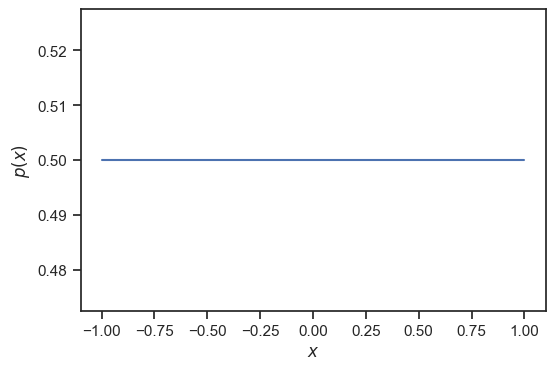

In [4]:
mu = [1.0]
pdf, lambdas = reconstruct(mu, bnds=[-1.0, 1.0])

# plot the reconstructed solution
x = np.linspace(-1.0, 1.0, 100)

fig, ax = plt.subplots()
ax.plot(x, pdf(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

## Mean constraint [-1,1]
Same as before, but we are now going to impose a mean constraint:

$$
\mathbb{E}[X] = \mu.
$$

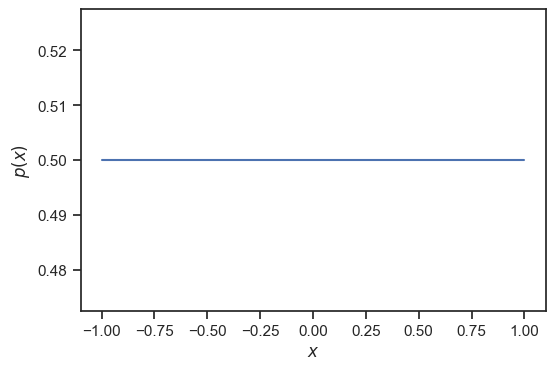

In [5]:
mu = [1.0, # The required normalization constraint
      0.0] # The mean constraint

pdf, lambdas = reconstruct(mu, bnds=[-1.0, 1.0])

# plot the reconstructed solution
x = np.linspace(-1.0, 1.0, 100)

fig, ax = plt.subplots()
ax.plot(x, pdf(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

### Questions

+ Modify the mean to $\mu=0.1$ and observe the resulting maximum entropy pdf.
+ Modify the mean to $\mu=-0.1$ and observe the resulting maximum entropy pdf.
+ Try $\mu=0.9$, what happens to the maximum entropy pdf?
+ Try $\mu=1.1$. Why does the code break down?

## Variance constraint
In addition to the mean constraint, we now include a variance constraint:

$$
\mathbb{V}[X] = \sigma^2.
$$

However, note that ``PyMaxEnt`` works only with moment constraints.
Therefore, we need to connect the variance to the second and first moments.
Here is how to do this:

$$
\mathbb{E}[X^2] = \mathbb{V}[X] + \left(\mathbb{E}[X]\right)^2 = \sigma^2 + \mu^2.
$$

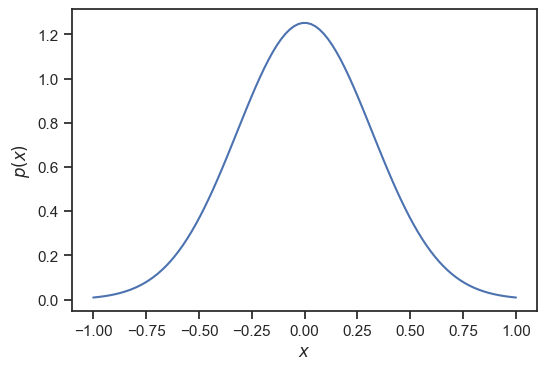

In [6]:
mu = 0.0
sigma2 = 0.1
mus = [
    1.0, # The required normalization constraint
    mu,  # The mean constraint
    sigma2 + mu ** 2
] # The second moment constraint 

pdf, lambdas = reconstruct(mus, bnds=[-1.0, 1.0])

# plot the reconstructed solution
x = np.linspace(-1.0, 1.0, 100)

fig, ax = plt.subplots()
ax.plot(x, pdf(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

### Questions

+ Modify the variance to $\sigma^2=0.3$ and observe the resulting maximum entropy pdf.
+ Modify the variance to $\sigma^2=0.4$ and observe the resulting maximum entropy pdf. Why did you get this abrapt change?
+ Try $\sigma^2=1$. Why does the code break down?